# Data Collection

excl means 0\
incl means 1\
nine means 2

cadical-high-60K-1227B.champsimtrace.xz means 0\
cadical-high-60K-134B.champsimtrace.xz means 1\
kissat-inc-high-30K-1802B.champsimtrace.xz means 2

drrip means 0\
fifo means 1\
lfu means 2\
lru means 3\
ship means 4\
ssrip means 5

stores 3->3->6 - heir->trace->repl: [IPC, L1D-MR, L2-MR, LLC-MR]

example: suppose you want the [IPC, L1D-MR, L2-MR, LLC-MR] for incl, cadical-high-60K-134B.champsimtrace.xz, lfu\
use final[1][0][2]\
code will be modified in case we implement the size thing

In [1]:
import os

files_excl = sorted(os.listdir('./results/results_excl/results_30M'))
files_incl = sorted(os.listdir('./results/results_incl/results_30M'))
files_nine = sorted(os.listdir('./results/results_nine/results_30M'))

final = [[], [], []] # stores 3->3->6 - heir->trace->repl: [IPC, L1D-MR, L2-MR, LLC-MR]

for i in range(3):
    for_each_trace = []
    for j in range(6):
        for_each_repl = []
        file = open('./results/results_excl/results_30M/%s'%(files_excl[6*i+j]), 'r').read().split('\n')
        line = 0
        while(not file[line].startswith('CPU 0 cumulative IPC')):
            line = line+1
        for_each_repl.append(float(file[line].split()[4]))
        while(not file[line].startswith('L1D TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('L2C TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('LLC TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        for_each_trace.append(for_each_repl)
    final[0].append(for_each_trace)

for i in range(3):
    for_each_trace = []
    for j in range(6):
        for_each_repl = []
        file = open('./results/results_incl/results_30M/%s'%(files_incl[6*i+j]), 'r').read().split('\n')
        line = 0
        while(not file[line].startswith('CPU 0 cumulative IPC')):
            line = line+1
        for_each_repl.append(float(file[line].split()[4]))
        while(not file[line].startswith('L1D TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('L2C TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('LLC TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        for_each_trace.append(for_each_repl)
    final[1].append(for_each_trace)

for i in range(3):
    for_each_trace = []
    for j in range(6):
        for_each_repl = []
        file = open('./results/results_nine/results_30M/%s'%(files_nine[6*i+j]), 'r').read().split('\n')
        line = 0
        while(not file[line].startswith('CPU 0 cumulative IPC')):
            line = line+1
        for_each_repl.append(float(file[line].split()[4]))
        while(not file[line].startswith('L1D TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('L2C TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('LLC TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        for_each_trace.append(for_each_repl)
    final[2].append(for_each_trace)

for i in final:
    print(i)

[[[0.138605, 0.18189939715940467, 0.9932253860947265, 0.8503195368851191], [0.137849, 0.18190566609013262, 0.9932422478787892, 0.8618379197084901], [0.146196, 0.1818242755931157, 0.9932448130468847, 0.9955079625382055], [0.137849, 0.18190566609013262, 0.9932422478787892, 0.8618379197084901], [0.149339, 0.18183156927626104, 0.9932048722052046, 0.7814754448745836], [0.139961, 0.18187883497941126, 0.9932448080959696, 0.8122347252906181]], [[0.150587, 0.17193719361106957, 0.996191540141167, 0.8510890585362848], [0.149775, 0.17193630919676106, 0.9961663472284057, 0.8627763243111445], [0.158082, 0.17194282614725453, 0.9961624108357867, 0.9975540500979412], [0.149775, 0.17193630919676106, 0.9961663472284057, 0.8627763243111445], [0.161786, 0.17200587987159618, 0.9961635917535724, 0.7811581597207989], [0.152146, 0.17193766337698355, 0.9961635887332482, 0.8131444277044312]], [[0.29296, 0.05381575889953724, 0.9857146459779267, 0.8495725808943969], [0.292663, 0.05381581628508407, 0.98556783854424

# Time to Plot

We'll have 12 plots, 4 for each trace (comparing IPC and the 3 miss-rates respectively).\
Each plot has 6 (corresponding to 6 replacement policies) times 3 (corresponding to 3 hierarchy policies) = 18 bars.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
barWidth = 0.1
traces = ['cadical-high-60K-1227B.champsimtrace.xz', 'cadical-high-60K-134B.champsimtrace.xz', 'kissat-inc-high-30K-1802B.champsimtrace.xz']

In [3]:
def plot_graph(trace):
	XLABS = ['IPC', 'L1D miss-rate', 'L2C miss-rate', 'LLC miss-rate']

	for j in range(4):
		fig = plt.subplots(figsize =(12, 8))

		EXCL = []
		INCL = []
		NINE = []

		for i in range(6):
			EXCL.append(final[0][trace][i][j])
			INCL.append(final[1][trace][i][j])
			NINE.append(final[2][trace][i][j])

		br1 = np.arange(6)
		br2 = [x + barWidth for x in br1]
		br3 = [x + barWidth for x in br2]

		plt.bar(br1, EXCL, color ='r', width = barWidth, edgecolor ='grey', label ='EXCL')
		plt.bar(br2, INCL, color ='g', width = barWidth, edgecolor ='grey', label ='INCL')
		plt.bar(br3, NINE, color ='b', width = barWidth, edgecolor ='grey', label ='NINE')

		plt.xticks([r + barWidth for r in range(6)], ['drrip', 'fifo', 'lfu', 'lru', 'ship', 'srrip'])

		plt.ylabel(XLABS[j], fontweight ='bold', fontsize = 15)

		plt.ylim(min(EXCL+INCL+NINE)*0.99, max(EXCL+INCL+NINE)*1.01)
		plt.title(traces[trace])

		plt.show()

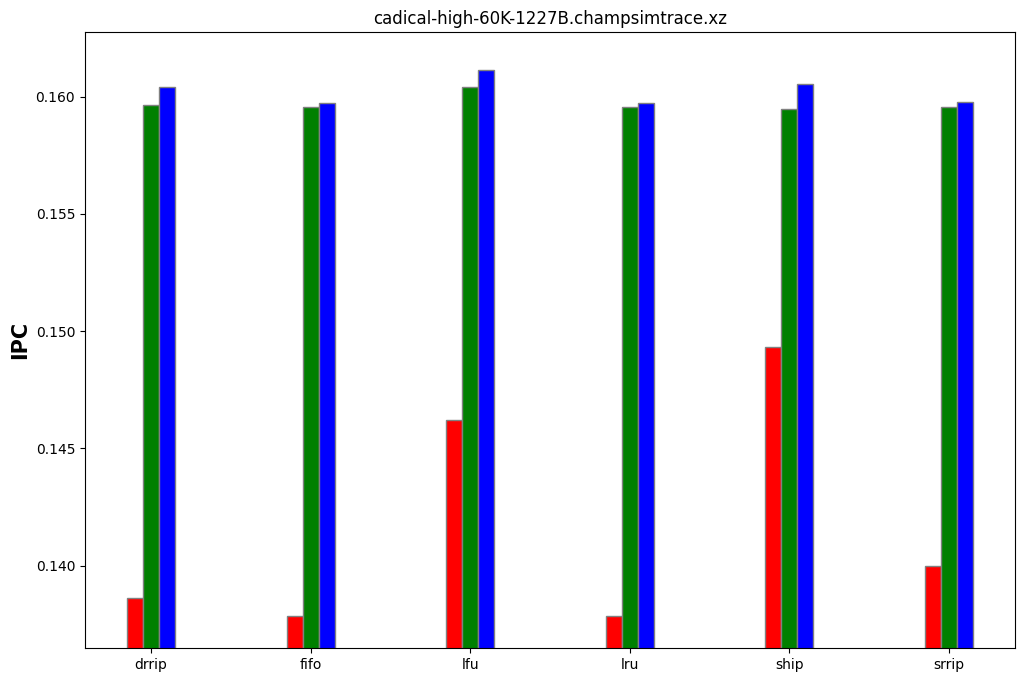

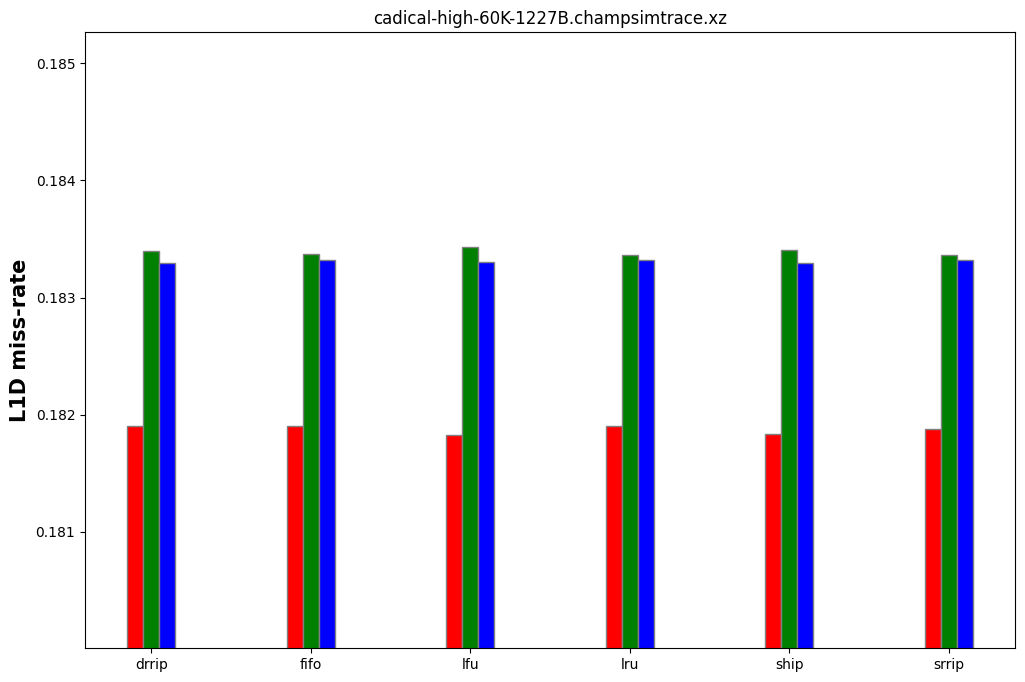

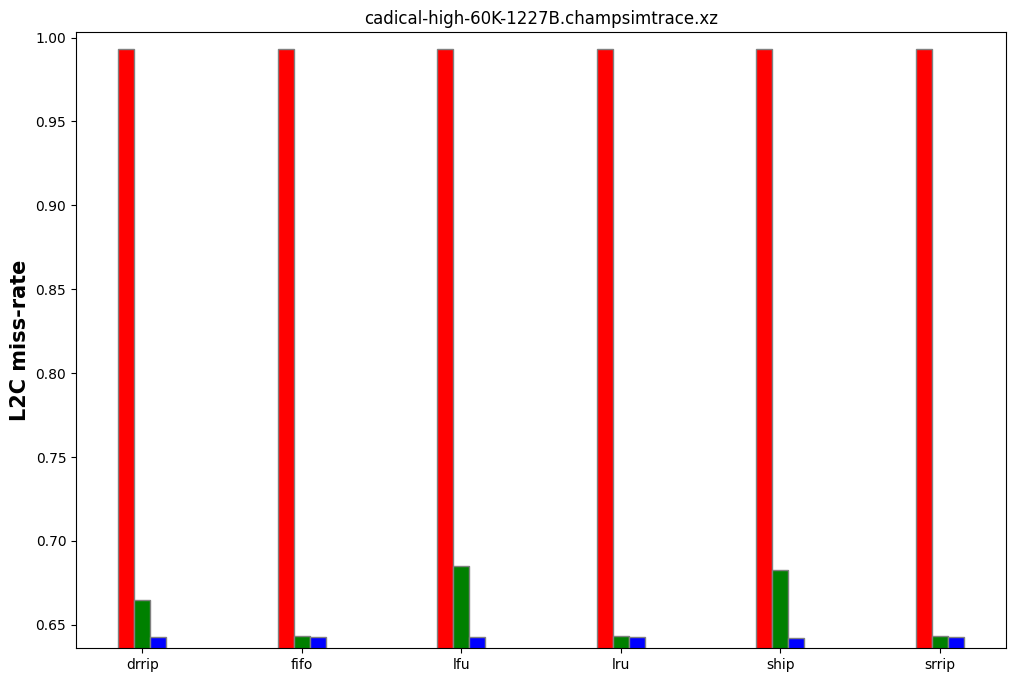

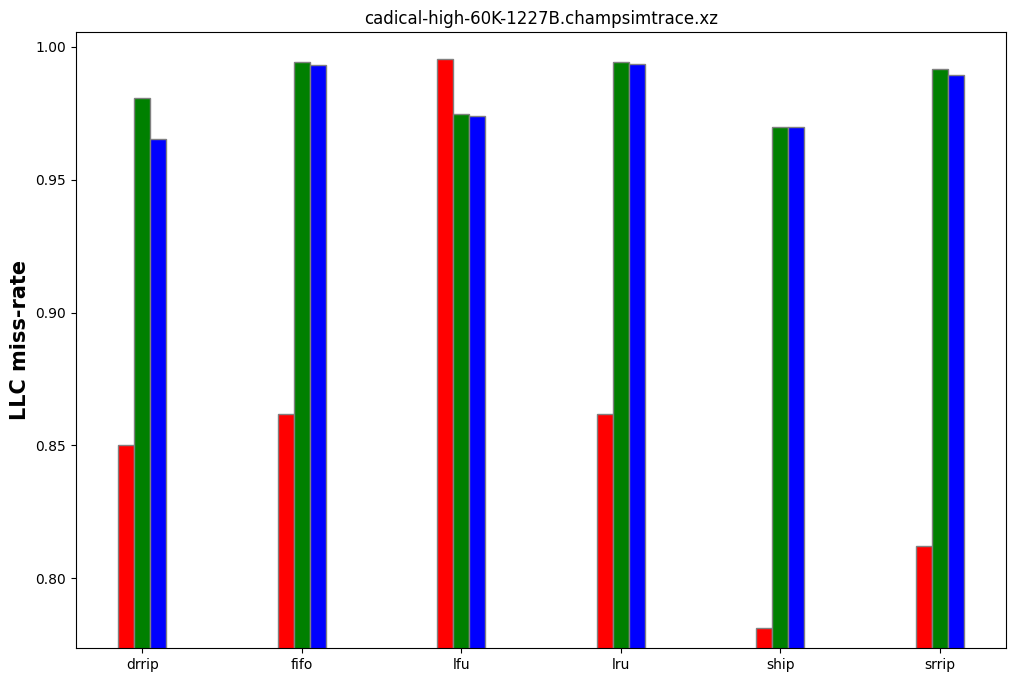

In [4]:
plot_graph(0)

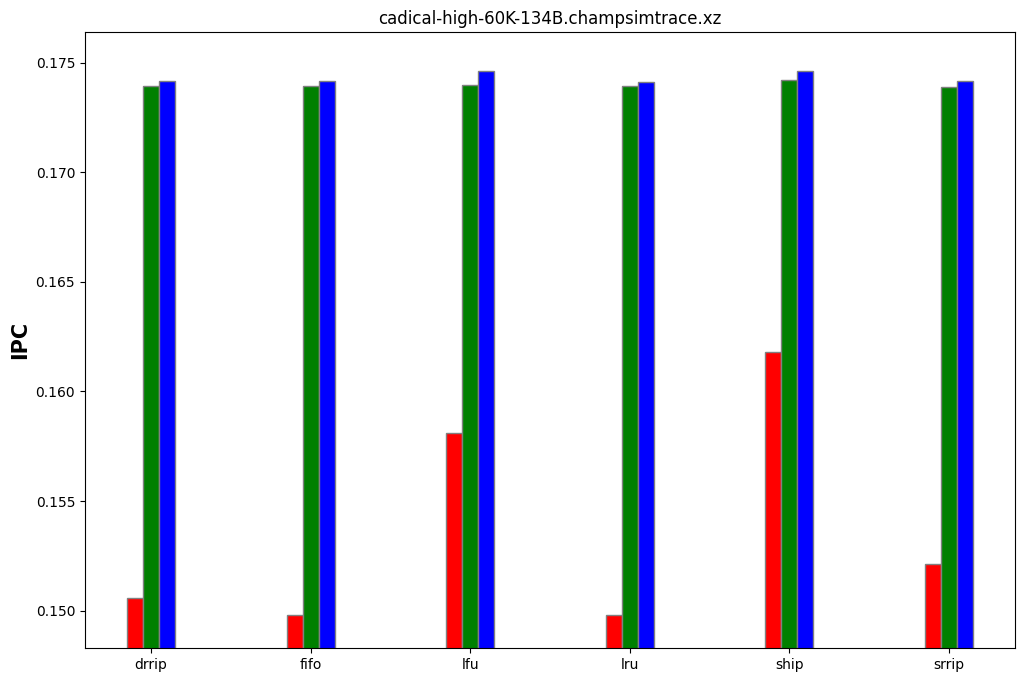

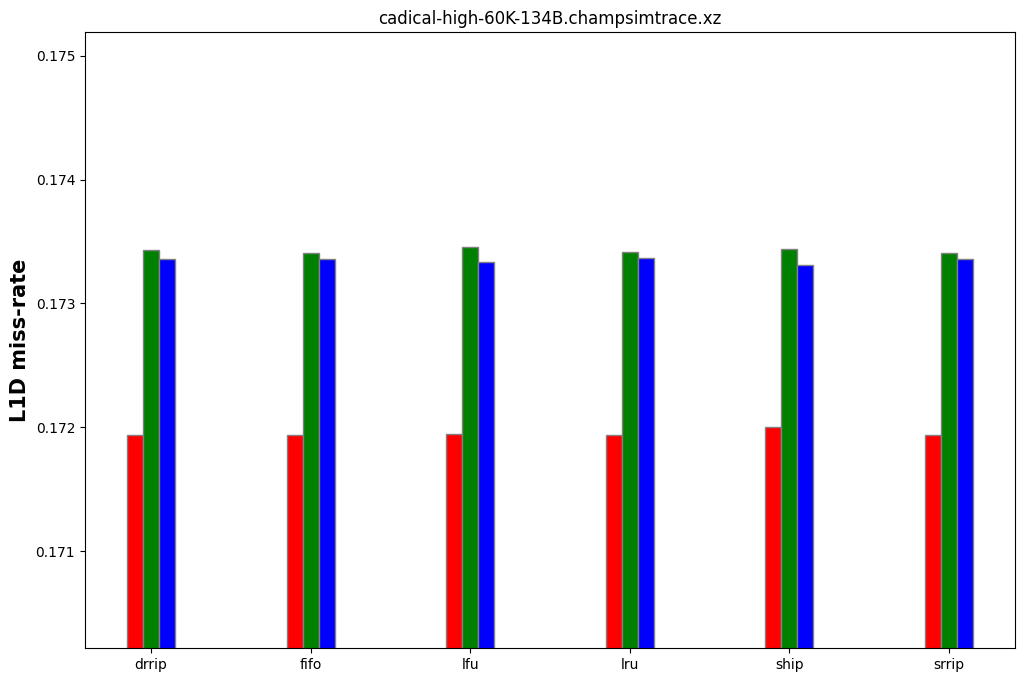

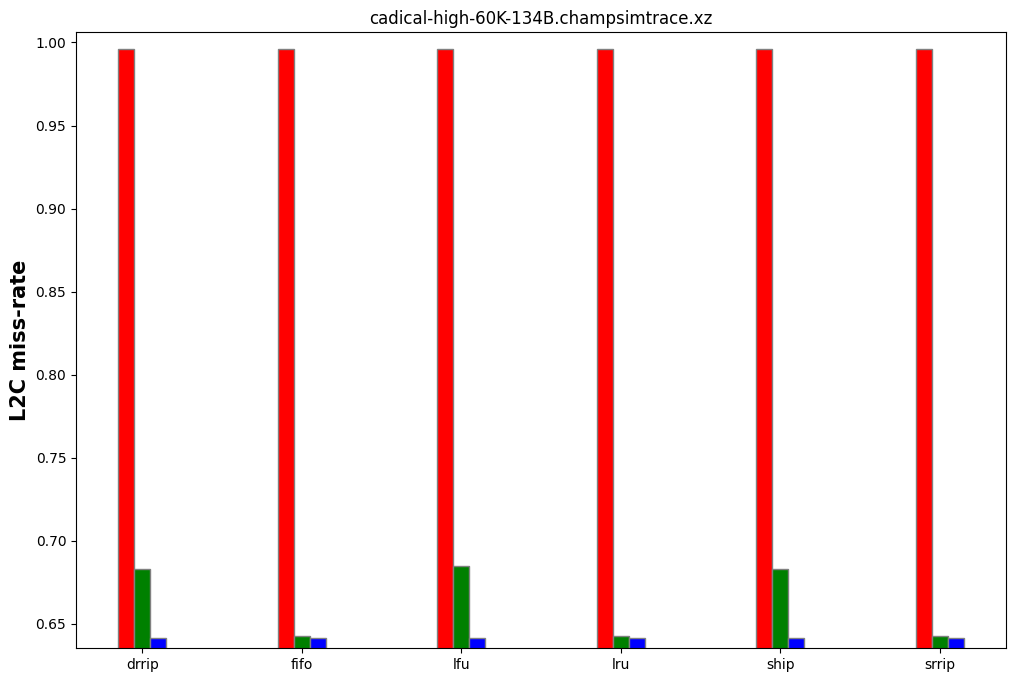

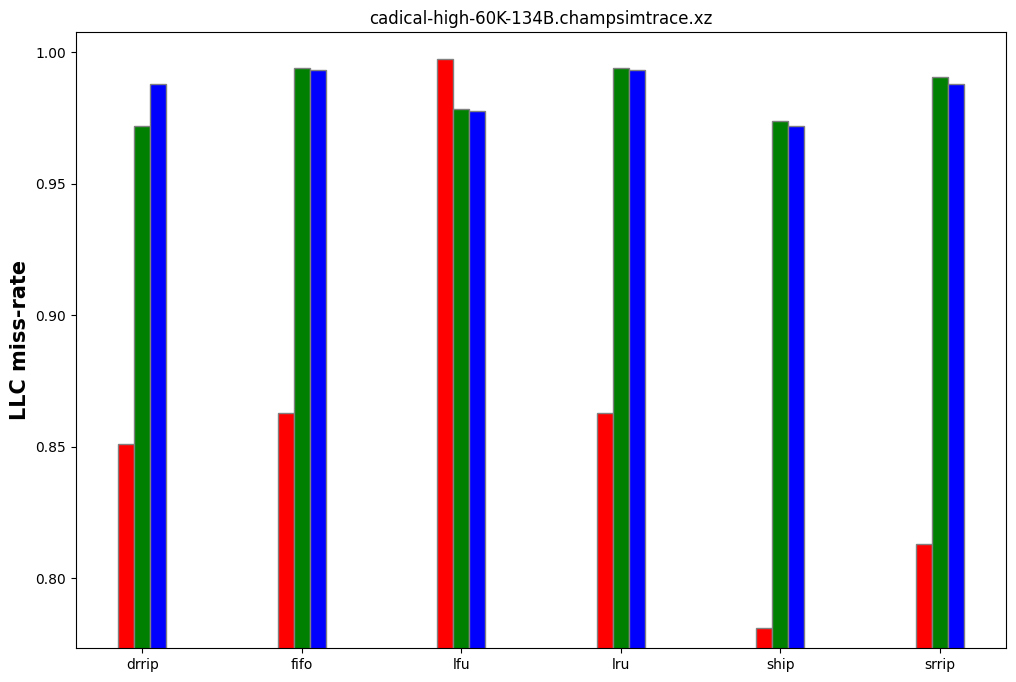

In [5]:
plot_graph(1)

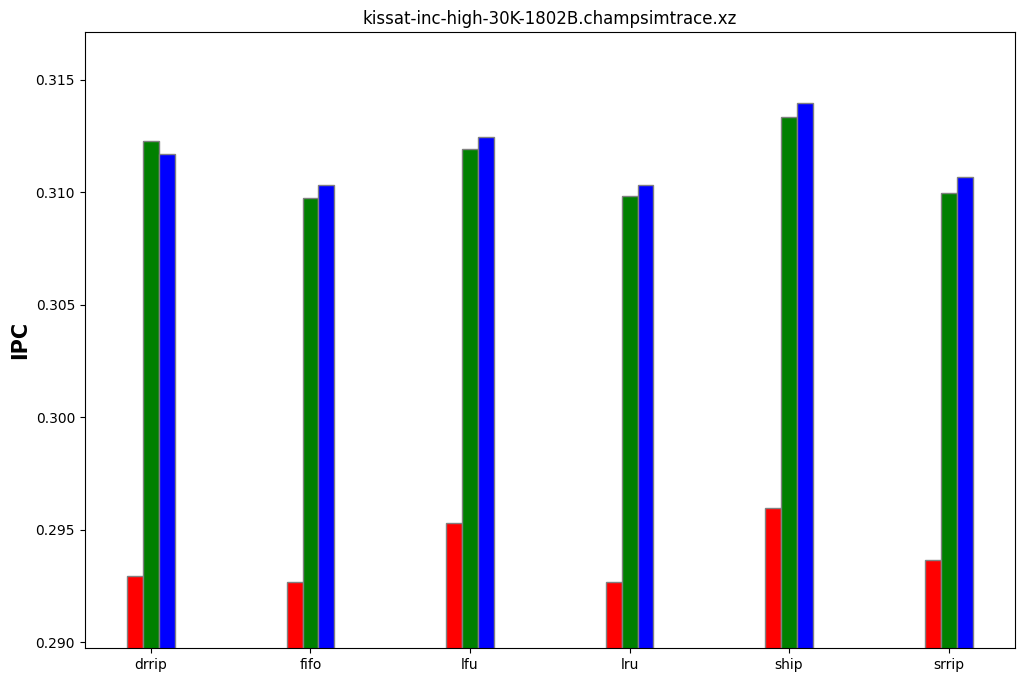

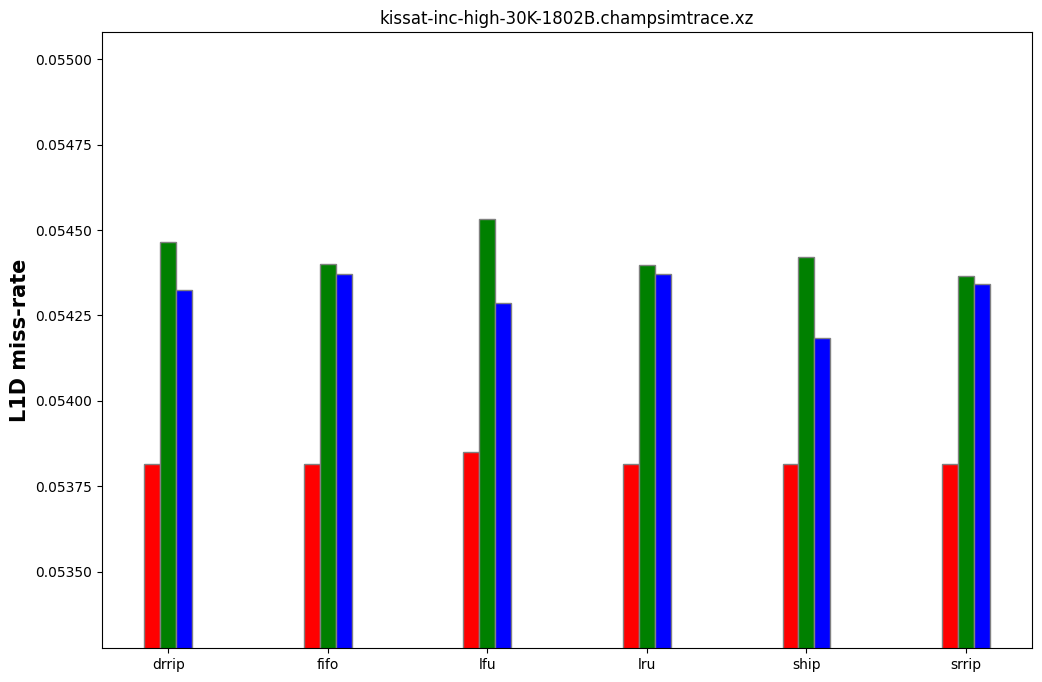

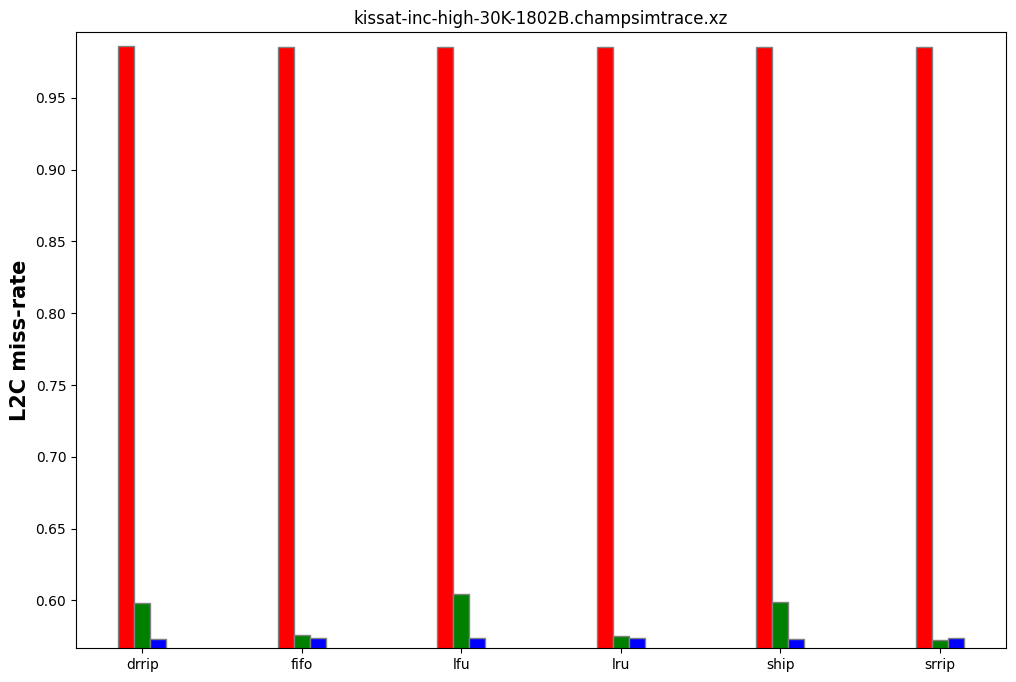

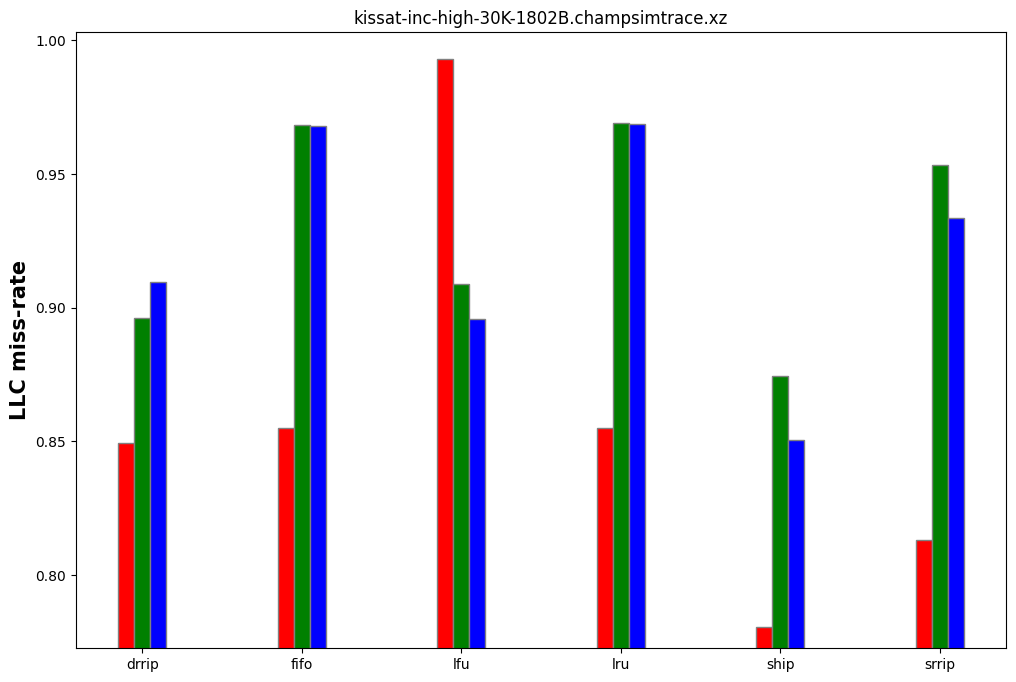

In [6]:
plot_graph(2)